In [3]:
import vector
import jax
import madjax as mj
import numpy as np
import matplotlib.pyplot as plt

In [4]:
E_cm = 15*2
me = mj.MadJax('iml_example')
print(me.processes)
func = me.matrix_element(E_cm,'Matrix_1_epem_mupmum', return_grad=False)
func_default = lambda ps: func({},ps)


{'Matrix_1_epem_mupmum': <class 'iml_example.processes.all_processes.Matrix_1_epem_mupmum'>}


In [5]:
ps_maker = me.phasespace_generator(E_cm,'Matrix_1_epem_mupmum')

what = lambda ps: ps_maker({}).generateKinematics(E_cm,ps)[1]

ps_points = np.random.uniform([0.0,0.0],[1,1], size = (1000,2))
jax.vmap(what)(ps_points).mean()

DeviceArray(1.57079633, dtype=float64)

In [6]:
np.pi/2

1.5707963267948966

In [7]:

ps_maker = me.phasespace_vectors(E_cm,'Matrix_1_epem_mupmum')

hyper2vec =  lambda ps: ps_maker({},ps)[2:]

vectors = hyper2vec([0.0001,0.3])
vectors = vector.array(dict(zip(['E','x','y','z'],vectors.T)))
vectors.phi

array([ 1.88495559, -1.25663706])

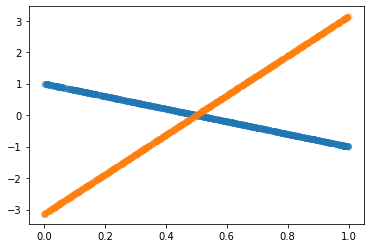

In [8]:
ps_points = np.random.uniform([0.0,0.0],[1,1], size = (1000,2))
vectors = jax.vmap(hyper2vec)(ps_points)

vectors = vector.array(dict(zip(['E','x','y','z'],vectors.T)))
plt.scatter(ps_points[:,0],np.cos(vectors.theta[1]),alpha = 0.2)
# plt.scatter(2*((1-ps_points[:,0])-0.5),np.cos(vectors.theta[1]),alpha = 0.2)
plt.scatter(ps_points[:,1],vectors.phi[1],alpha = 0.2)

(0.9, 1.1)

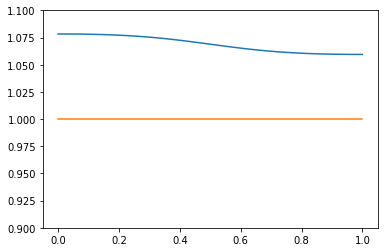

In [9]:
def angle_part(xi):
    cos_theta = 2*((1-xi[0])-0.5)
    angle_part = 1/4*((1+cos_theta)**2 + (1+cos_theta)**2 + (1-cos_theta)**2 + (1-cos_theta)**2)
    return angle_part

def pre_part():
    alpha = 1/137
    pre = (4*np.pi*alpha)**2
    return pre
    
def qed_xcheck(xi):
    return pre_part()*angle_part(xi)
    
E_cm = 5*2
me = mj.MadJax('iml_example')
func = me.matrix_element(E_cm,'Matrix_1_epem_mupmum', return_grad=False)
func_default = lambda ps: func({},ps)

xi = np.linspace(0,1)
ps_points = np.array(list(np.broadcast(xi,0.5)))
yi = jax.vmap(func_default)(ps_points)
yi_base = jax.vmap(qed_xcheck)(ps_points)
# plt.plot(xi,yi)
plt.plot(xi,yi/yi_base)
plt.plot(xi,np.ones(xi.shape))
plt.ylim(0.9,1.1)
# plt.ylim(0,yi.max()*2)

In [10]:
ps_points = np.random.uniform([0.0,0.0],[1,1], size = (1000000,2))
jax.vmap(angle_part)(ps_points).mean()*4, 8/3

(DeviceArray(5.33208511, dtype=float64), 2.6666666666666665)

In [11]:
def fermi_prefac(s):
    return (1/64*np.pi**2*s)
pre_part()*fermi_prefac(E_cm**2)

0.12974731077042254

/var/folders/hn/y10jq2sn3cs3wnqv65l2rc040000gn/T/ipykernel_56870/1877743198.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  xsec = (4*np.pi)/3*alpha**2/s


0.09655567738056342


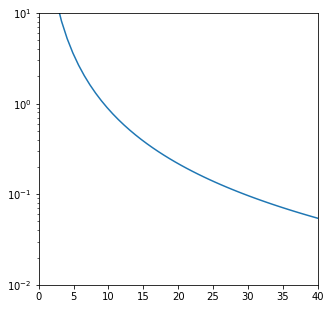

In [12]:
def prefac(E_cm):
    s = E_cm**2
    pre = 1/64 * 1/np.pi**2 * 1/s
    return pre


def qed(E_cm):
    alpha = 1/137
    s = E_cm**2
    xsec = (4*np.pi)/3*alpha**2/s
    return xsec / (2.56819*10**(-9)) / 1000

EE = np.linspace(0,40)
XX = np.array([qed(e) for e in EE])
plt.plot(EE,XX)
plt.semilogy()
plt.ylim(0.01,10)
plt.xlim(0,40)
plt.gcf().set_size_inches(5,5)
print(qed(30))

In [13]:
xsec = jax.vmap(func_default)(ps_points)
xsec.mean()

DeviceArray(0.01198781, dtype=float64)

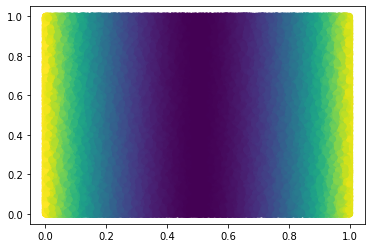

In [14]:
plt.scatter(ps_points[:,0], ps_points[:,1], c=xsec)

In [19]:
# !pip install pylhe
# import pylhe
# evts = [e for e in pylhe.readLHE('unweighted_events.lhe.gz')]
# parts = evts[0].particles
# e = evts[0]
# e.eventinfo.weight

In [ ]:
sampled_points = np.array([[[p.e,p.px,p.py,p.pz] for p in e.particles[:2] + e.particles[-2:]] for e in evts])
sampled_points.shape

In [ ]:
ps_maker = me.phasespace_generator(E_cm,'Matrix_1_mupmum_epem')
ps_maker = ps_maker({})
a,b = jax.vmap(ps_maker.invertKinematics, in_axes = (None,0))(E_cm,sampled_points)
a = np.column_stack([a[0],a[1]])
plt.scatter(a[:,0],a[:,1], alpha = 0.04)

In [ ]:
bins = np.linspace(0,1,101)
plt.hist(a[:,0], bins = bins, density=True, histtype = 'step');
plt.hist(a[:,1], bins = bins, density=True, histtype = 'step');

In [ ]:
a[:,0].min(),a[:,0].max(),a[:,1].min(),a[:,1].max()